In [1]:
import json

import pandas as pd

In [10]:
data = pd.read_excel("../test_data/mae_raw_data.xlsx")

In [11]:
data

,Source,Time,Char Count/Day,Line Count/Day,Char Count/Hour
0,ATRI,3.49,15163,526,4345
1,ATRI,4.58,16281,808,3555
2,ATRI,2.59,16664,799,6434
3,ATRI,2.97,18938,915,6376
4,ATRI,2.66,17020,797,6398
...,...,...,...,...,...
262,フェイト／ステイナイト,2.03,30028,1295,14792
263,薄桜鬼 新選組奇譚,3.20,35142,1593,10982
264,薄桜鬼 新選組奇譚,2.77,35023,1623,12644
265,薄桜鬼 新選組奇譚,2.50,37212,1861,14885


In [12]:
data["name"] = data["Source"]

In [13]:
data["lines_read"] = data["Line Count/Day"]
data["chars_read"] = data["Char Count/Day"]
data["time_read"] = data["Time"] * 60 * 60
data["last_line_recieved"] = None

In [14]:
data["date"] = pd.date_range(start="January 31st 2021", periods=len(data), freq="1D", tz="Asia/Manila").strftime('%Y/%m/%d')

In [7]:
data["game_date"] = data["name"] + "_" + data["date"]

In [8]:
data.drop(["Source", "Time", "Char Count/Day", "Line Count/Day", "Char Count/Hour"], axis=1, inplace=True)

In [9]:
game_entries = {
    game_dataframe[0]: {
        "name": game_dataframe[0],
        "dates_read_on": game_dataframe[1].drop("game_date", axis=1)["date"].to_list(),
        "last_line_added": None
    } for game_dataframe in data.groupby("name")
}

In [10]:
games = {"games": list(data["name"].unique())}

In [11]:
data.drop(["name", "date"], axis=1, inplace=True)

In [12]:
data

,lines_read,chars_read,time_read,last_line_recieved,game_date
0,526,15163,12564.0,None,ATRI_2021/01/31
1,808,16281,16488.0,None,ATRI_2021/02/01
2,799,16664,9324.0,None,ATRI_2021/02/02
3,915,18938,10692.0,None,ATRI_2021/02/03
4,797,17020,9576.0,None,ATRI_2021/02/04
...,...,...,...,...,...
262,1295,30028,7308.0,None,フェイト／ステイナイト_2021/10/20
263,1593,35142,11520.0,None,薄桜鬼 新選組奇譚_2021/10/21
264,1623,35023,9972.0,None,薄桜鬼 新選組奇譚_2021/10/22
265,1861,37212,9000.0,None,薄桜鬼 新選組奇譚_2021/10/23


In [13]:
game_date_entries = {game_dataframe[0]: game_dataframe[1].drop("game_date", axis=1).to_dict(orient="records")[0] for game_dataframe in data.groupby("game_date")}

In [14]:
insertion_dict = games | game_entries | game_date_entries

In [15]:
insertion_dict

{'games': ['ATRI',
  'ISLAND',
  'ファタモル',
  '白昼夢',
  '剣が君',
  'あやかしごはん',
  '大正×対称アリス',
  'あやかしごはんおかわり',
  'ソナーニル',
  'Angel Beats!',
  '穢翼のユースティア',
  'PARQUET',
  'オメガヴァンパイア',
  'ホワイトアルバム2',
  '君と彼女と彼女の恋',
  'サクラノ詩－櫻の森の上を舞う－',
  'シュタインズ・ゲート',
  'フェイト／ステイナイト',
  '薄桜鬼 新選組奇譚'],
 'ATRI': {'name': 'ATRI',
  'dates_read_on': ['2021/01/31',
   '2021/02/01',
   '2021/02/02',
   '2021/02/03',
   '2021/02/04',
   '2021/02/05',
   '2021/02/06',
   '2021/02/07',
   '2021/02/08',
   '2021/02/09',
   '2021/02/10',
   '2021/02/11',
   '2021/02/12',
   '2021/02/13',
   '2021/02/14',
   '2021/02/15',
   '2021/02/16',
   '2021/02/17',
   '2021/02/18'],
  'last_line_added': None},
 'Angel Beats!': {'name': 'Angel Beats!',
  'dates_read_on': ['2021/07/17',
   '2021/07/18',
   '2021/07/19',
   '2021/07/20',
   '2021/07/21',
   '2021/07/22',
   '2021/07/23',
   '2021/07/24',
   '2021/07/25',
   '2021/07/26',
   '2021/07/27',
   '2021/07/28',
   '2021/07/29',
   '2021/07/30'],
  'last_line_added': None},
 'I

In [16]:
with open("../test_data/mae_processed_data.json", "w", encoding="utf-8") as file:
    json.dump(insertion_dict, file, ensure_ascii=False)

In [18]:
data["time_read"] = data["time_read"] / (60 * 60)
data["read_speed"] = data["chars_read"] / data["time_read"]
data["date"] = pd.date_range(start="January 31st 2021", periods=len(data), freq="1D", tz="Asia/Manila")

In [19]:
data

,lines_read,chars_read,time_read,last_line_recieved,game_date,read_speed,date
0,526,15163,3.49,None,ATRI_2021/01/31,4344.699140,2021-01-31 00:00:00+08:00
1,808,16281,4.58,None,ATRI_2021/02/01,3554.803493,2021-02-01 00:00:00+08:00
2,799,16664,2.59,None,ATRI_2021/02/02,6433.976834,2021-02-02 00:00:00+08:00
3,915,18938,2.97,None,ATRI_2021/02/03,6376.430976,2021-02-03 00:00:00+08:00
4,797,17020,2.66,None,ATRI_2021/02/04,6398.496241,2021-02-04 00:00:00+08:00
...,...,...,...,...,...,...,...
262,1295,30028,2.03,None,フェイト／ステイナイト_2021/10/20,14792.118227,2021-10-20 00:00:00+08:00
263,1593,35142,3.20,None,薄桜鬼 新選組奇譚_2021/10/21,10981.875000,2021-10-21 00:00:00+08:00
264,1623,35023,2.77,None,薄桜鬼 新選組奇譚_2021/10/22,12643.682310,2021-10-22 00:00:00+08:00
265,1861,37212,2.50,None,薄桜鬼 新選組奇譚_2021/10/23,14884.800000,2021-10-23 00:00:00+08:00


<AxesSubplot:xlabel='date'>

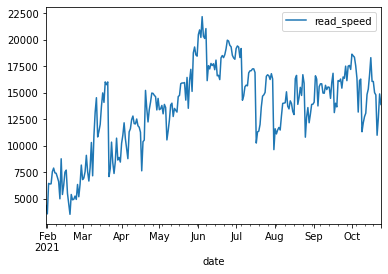

In [23]:
data[["date", "read_speed"]].plot(x="date")